# Labcontrol Python scripts maken

Het doel van Labcontrol is het bieden van een eenvoudige, objectgeorienteerde interface naar beschikbare meetapparatuur in een labruimte.
Met behulp van Python scripts kun je, via deze interace, metingen automatiseren. Hoe aan de benodigde kennis komt, hangt van jou manier
van leren af. Wil je eerst iets weten over de denkwijze (het ontwerp) achter labcontrol, lees hier (link) dan verder.
Maar als je liever al doende in de code wilt duiken, lees dan gewoon verder.

Deze Notebookpagina heeft tot doel een gebruiker op praktische wijze aan de slag met labcontrol te helpen. Dat gaat aan de hand van de 
bespreking van een tweetal Python scripts: 
1. Een script die je helpt een weerstand met een Digitale Multimeter (DMM) te meten en 
2. Een script die de tranfercurve van een transistor kan meten.
Bij de bespreking van de scripts wordt er vanuit gegaan dat de lezer beschikt over de genoemde apparatuur. Mocht dat niet het geval zijn,
sla de uitvoeringstap over en duik dan zelf in de code om uit te vinden hoe een andere apparaat zou kunnen besturen.

# Een script om weerstanden te meten.
Wanneer je een Jupyter Notebook Server via de snelkoppeling opstart, is de notebooks map altijd startpunt (m.a.w. deze map is de 
homedirectory van de opgestarte Jupyter Notebook Server instantie). Navigeer, via de Jupyter Notebook webinterface, via de verkenner 
of via jouw favoriete IDE, de (sub)map examples. In deze map staat o.a. het bestand 'weerstandsmetingDMM.py' Open dit bestand maar zorg
ervoor dat deze Notebook beschikbaar blijft. Eert laten we het script runnen. 

## uitvoering van het script.
Om het script te runnen moet dit Notebook weten dat dit Python script bestaat. Daarom wordt er in onderstaand codeblok eerst een 
import gedaan, iets dat je kan vergelijken met #include binnen de programmeertaal C. Voer het onderstaande blok uit.

In [ ]:
import examples as ex

Als het goed is voert Jupyter deze instructie uit en krijg jij verder geen melding te zien. Nu kan Jupyter in het bestand kijken waardoor jij kan zeggen welke functie uitgevoerd moet gaan worden. In dit voorbeeld willen we de functie 'meetweerstandTW' laten uitvoeren. Daarvoor hebben we een Siglent DMM (3045SX) nodig. Sluit de dmm, via de USB aansluiting op de achterkant, aan jouw computer. Schakel de dmm in en wacht tot het apparaat is opgestart. Voer dan onderstaand codeblok uit.  

In [ ]:
ex.meetweerstandTW()

# Werking van het script

Magisch, niet? Je hoeft zelf niet meer na te denken! De functie vraagt om (a) eerst de meetdraden kort te sluiten en dan om (b) de weerstand er tussen te hangen. Na het drukken op de toets meet het script, via de dmm, bij (a) eerst de verliesweerstand om (b) de (netto) waarde van de weerstand te berekenen en deze af te drukken.
Open het bestand WeerstandsmetingDMM.py en zoek in het bestand de functie meetweersstandTW() op. Je ziet dan onderstaande functie:

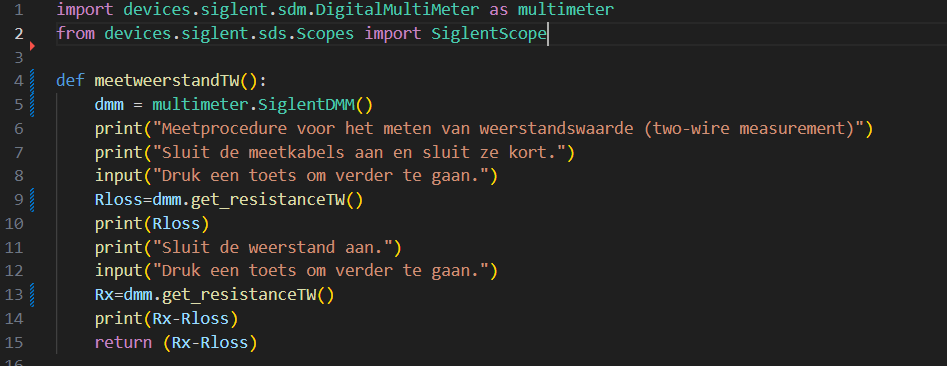

Bovenstaande afbeelding laat een deel van het bestand zien, het echte bestand is groter!

## Het importeren van het juiste apparaat
Elk Python script begint met het importeren van de juiste functionaliteit (als die niet standaard binnen Python aanwezig is). Bij dit script is dat geen ander verhaal. Voor correcte werking van de functie is de allereerste regel van groot belang. Deze regel importeert de code die nodig is de aansturing van de Siglent DMM. Tijdens de verdere bespreking van dit script gaan we uit van de "happy flow", dat wil zeggen, alle Python commands worden met succes uitgevoerd.

## Instantiëring van een apparaat
OO is de basis manier van coderen binnen Labcontrol. OO staat voor 'Object Oriented', of objectgeorienteerd in het Nederlands. Daarom ziet de eerste regel van de functie meetweerstandTW() als volgt uit:
dmm = multimeter.SiglentDMM()

Hierin is 'multimeter' de afkorting voor het pad naar de plek waar Jupyter de code kan vinden, in dit geval het bestand DigitalMultiMeter.py. Van dit bestand willen we de constructor van de klasse Siglent DMM aanroepen. In Python gaat dat via de punt (.) De constructor is een speciale functie van een klasse waarmee een object wordt aangemaakt en, indien succesvol, meteen wordt geretourneerd. Het object SiglentDMM wordt dan opgeslagen in de variabele dmm. Via deze variabele kunnen we de fysieke digitale multimeter besturen. Daarom is het belangrijk dat deze regel zonder problemen uitgevoerd wordt.

Zoals je kunt lezen in bovenstaande regel, wordt de constructor zonder parameter aangeroepen. Dat is een afspraak: via USB verbonden apparaten worden altijd zonder parameter geïnstantieerd. Als een meetapparaat, via een netwerk bereikt moet worden, moet er tijdens constructie van het object het IP adres als parameter aan de constructor worden meegegeven. Stel nu dat de DMM niet via USB, maar via UTP verbonden is en het ip-adres 10.0.34.168 heeft. Dan moet dit ip-adres als string worden meegeven aan de constructor:
dmm = multimeter.SiglentDMM("10.0.34.168")

Wil je weten hoe de code dit onderscheid maakt? Kijk dan in de code van de Siglent DMM. Het pad hiervoor is gelijk aan de import van dit script! Je kunt ook in de wiki van github Labcontrol kijken. Klik hier (link toevoegen)

## metingen doen met een apparaat
Voor het afdrukken van teksten en het wachten op het indrukken van een toets, worden standaard Python functies `print` en `input` gebruikt. Voor de inhoudelijke bespreking van dit script zijn die functie niet interessant. Wel interessant is de manier waarop je een meting doet met de DMM.
Het script laat de DMM twee keer een tweedraadsweerstandsmeting uitvoeren (TW = Two Wire). De manier binnen Labcontrol omdat te doen is via de objectreferentie, in dit geval de variabele `dmm`. Alle beschikbare apparaten binnen Labcontrol zijn op objectgeoriënteerde wijze geïmplementeerd. Om die reden wordt op een typische OO manier de functie get_resistanceTW() aangeroepen:

Rloss=dmm.get_resistanceTW() 
Rx=dmm.get_resistanceTW()

Kortom: een functie aanroepen van een apparaat gaat altijd via de punt (.): je roept altijd via het object de functie aan!

## Hoe kom ik erachter welke functionaliteit geïmplementeerd is?

Labcontrol is nog volop in ontwikkeling. Goede API documentatie is er (nog) niet. Om nu aan de benodigde informatie te komen, is via de Python code zelf. Het doel van deze paragraaf is om die werkwijze uit de doeken te doen. Omdat bij bovenstaand script de DMM is gebruikt, zal hier uitgelegd worden hoe je achter de geïmplementeerde functionaliteit kan komen. In principe is dat heel simpel: via de code. De code van de Siglent DMM is eenvoudig te vinden. In de map Notebooks staat een submap: devices. In deze submap vind je per merk een directory. Open de directory Siglent en vervolgens de map sdm. Open nu het bestand DigitalMultiMeter.py. Hieronder zie een afbeelding waarbij dit bestand geopend is in Visual Studio Code:
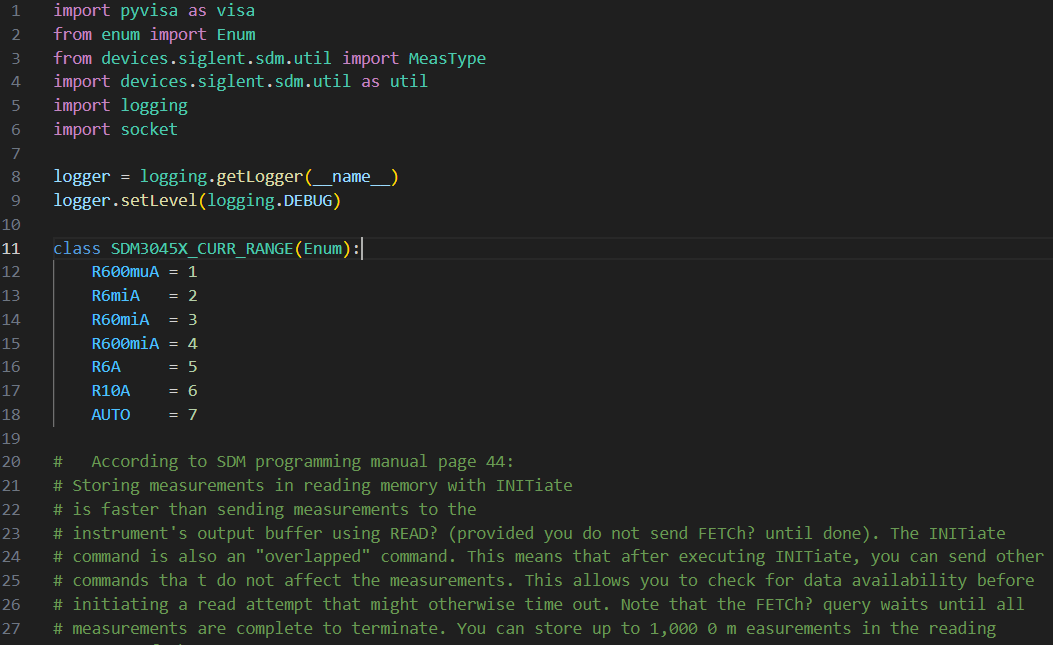

Scrol verder naar beneden. Het begint pas interessant te worden als een regel begint met het woord def:
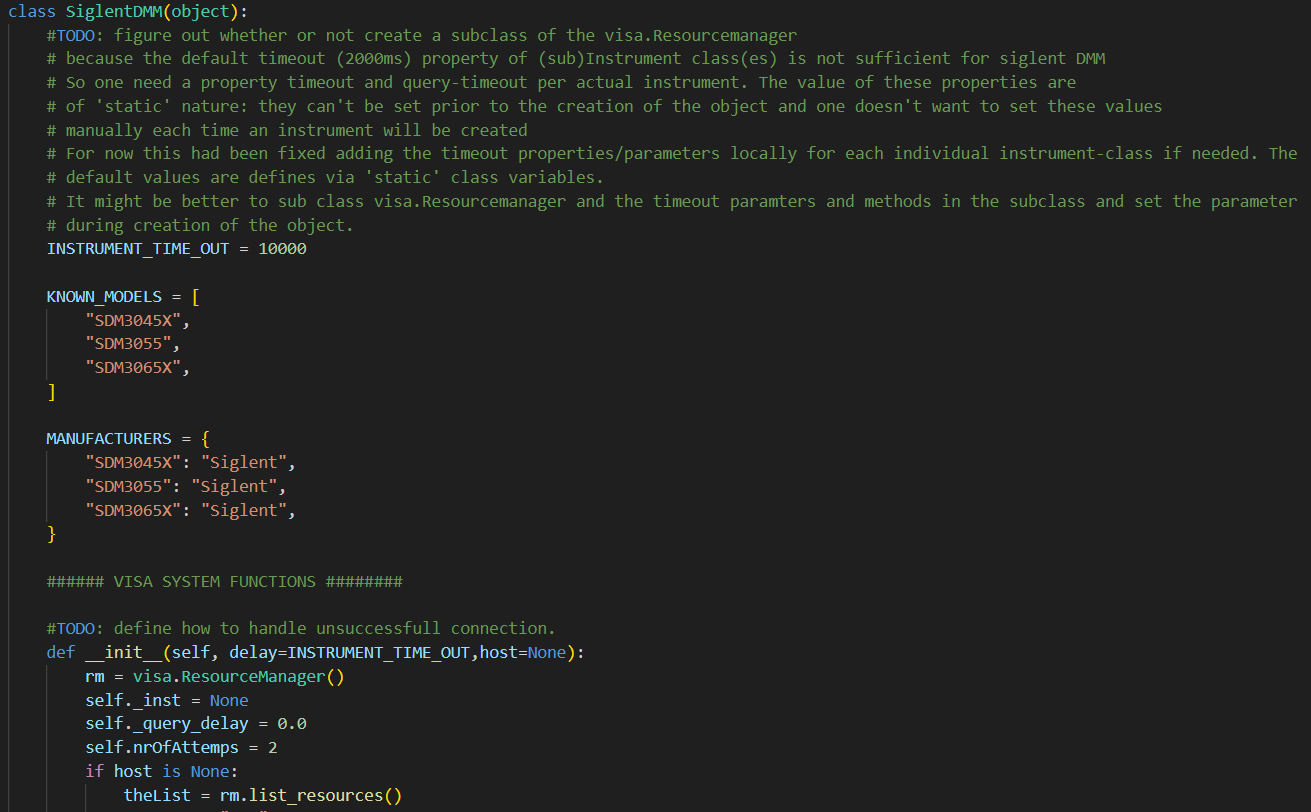

Laten we inzoomen op de __init__ functie, de Python manier om een constructor mee te definiëren.
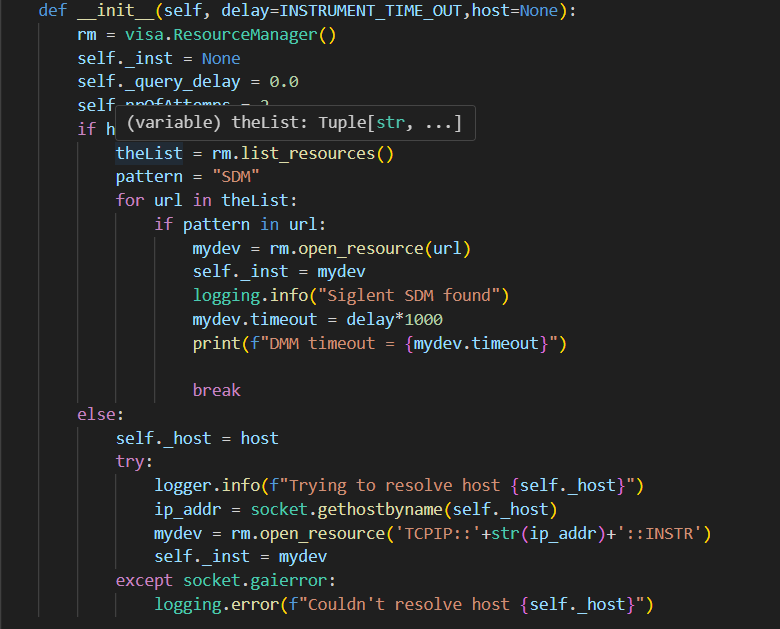

Blijkbaar kun je aan de constructor een host string meegeven. Doe je dat, dan gaat de coder ervan uit dat via TCP wilt connecten. Anders wordt een USB connectie verondersteld. Je ziet ook in bovenstaande afbeelding dat de init functie onderdeel is van een klasse. Dus wil je weten wat de functionaliteit is van een Siglent DMM object, zoek dan alle def worden binnen de klasse op. Ter illustratie laten we er nog een paar van die functies zien.
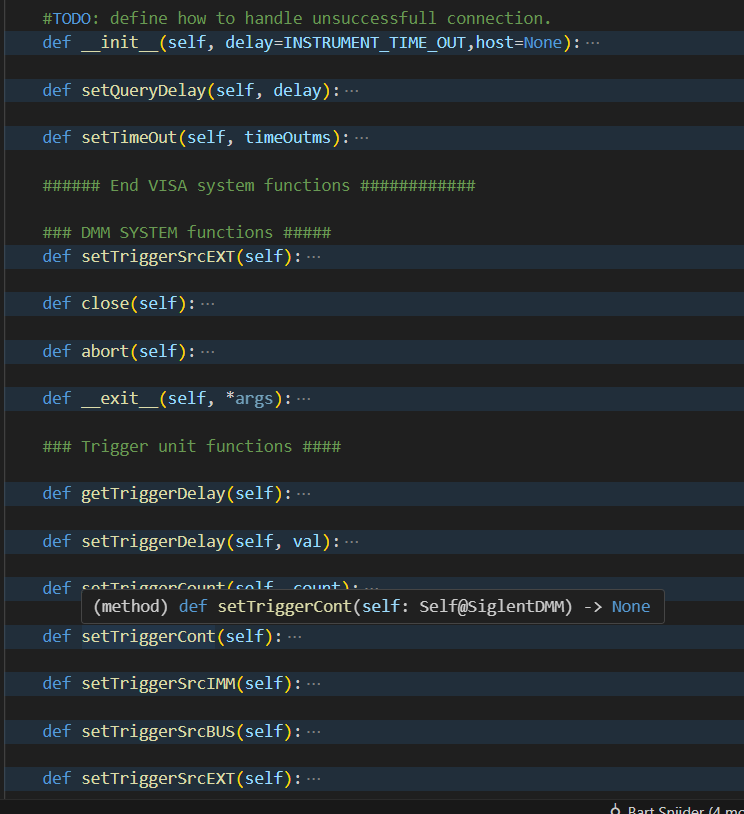

In dit plaatje zie alleen de functie definities. De bijbehorende code is ingeklapt. De naam van de functie geeft aan welk commando je naar de dmm wilt sturen. Zo kun je de query time-out, de trigger source instellen, autorange of manual range, een spanningswaarde opvragen en nog veel meer. Van elk apparaat dat in de devices map staat, kun je op deze manier de geboden functionaliteit opzoeken. 



